In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread('../images/qipu01.jpg')

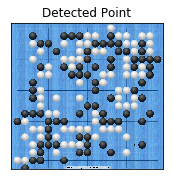

In [34]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200) 
#这个函数的第一个参 数是一个二值化图像，所以在进行霍夫变换之前要首先进行二值化，或者进行 Canny 边缘检测。第二和第三个值分别代表 ρ 和 θ 的精确度。第四个参数是 阈值，
#只有累加其中的值高于阈值时才被认为是一条直线

for rho,theta in lines[0]: 
    a = np.cos(theta) 
    b = np.sin(theta) 
    x0 = a*rho 
    y0 = b*rho 
    x1 = int(x0 + 1000*(-b)) 
    y1 = int(y0 + 1000*(a)) 
    x2 = int(x0 - 1000*(-b)) 
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    
#cv2.imwrite('houghlines.jpg',img)
plt.subplot(121),plt.imshow(img,'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])   
plt.show()
    

In [67]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
edges = cv2.Canny(gray,50,150,apertureSize = 3)

minLineLength = 1
maxLineGap = 10 
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv2.imwrite('hough.jpg',img)

True

In [2]:
#Hough 圆环变换
img = cv2.medianBlur(img,5) 
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20, param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles)) 
for i in circles[0,:]: 
    # draw the outer circle 
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle 
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv2.imshow('detected circles',cimg) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [36]:
import cv2 
import numpy as np
img = cv2.imread('../images/qipu01.jpg') 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
edges = cv2.Canny(gray,50,150,apertureSize = 3) 
minLineLength = 100 
maxLineGap = 10 
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap) 
for x1,y1,x2,y2 in lines[0]: 
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv2.imwrite('houghlines5.jpg',img)


True